In [1]:
from pymgrid.MicrogridGenerator import MicrogridGenerator
from pymgrid import Microgrid
from pymgrid.microgrid.modules import *
import numpy as np


In [2]:
# Generate the old way
mgen = MicrogridGenerator(nb_microgrid=25)
mgen.generate_microgrid()
microgrid = mgen.microgrids[2]

,load,cost_loss_load,cost_overgeneration,cost_co2,PV_rated_power,battery_soc_0,battery_power_charge,battery_power_discharge,battery_capacity,battery_efficiency,battery_soc_min,battery_soc_max,battery_cost_cycle,grid_weak,grid_power_import,grid_power_export,genset_polynom_order,genset_polynom_0,genset_polynom_1,genset_polynom_2,genset_rated_power,genset_pmin,genset_pmax,fuel_cost,genset_co2
0,960,10,1,0.1,969.60,0.200000,363,363,1452,0.9,0.2,1,0.02,0.0,1920.0,1920.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,60363,10,1,0.1,30785.13,0.200000,22819,22819,91274,0.9,0.2,1,0.02,1.0,120726.0,120726.0,3.0,1.635550,0.435848,0.045227,67070.0,0.05,0.9,0.4,2.0
2,43725,10,1,0.1,54219.00,0.200000,16529,16529,66116,0.9,0.2,1,0.02,NaN,NaN,NaN,3.0,6.681807,0.895812,0.005779,48584.0,0.05,0.9,0.4,2.0
3,78147,10,1,0.1,38292.03,0.200000,25613,25613,102450,0.9,0.2,1,0.02,NaN,NaN,NaN,3.0,4.766205,0.763615,0.025826,86830.0,0.05,0.9,0.4,2.0
4,49813,10,1,0.1,73225.11,0.200000,16327,16327,65305,0.9,0.2,1,0.02,0.0,99626.0,99626.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,28560,10,1,0.1,30559.20,1.000000,14396,14396,57581,0.9,0.2,1,0.02,NaN,NaN,NaN,3.0,5.861824,0.357242,0.057705,31734.0,0.05,0.9,0.4,2.0
6,49216,10,1,0.1,53645.44,0.960305,44844,44844,179373,0.9,0.2,1,0.02,0.0,98432.0,98432.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,11798,10,1,0.1,10028.30,1.000000,4834,4834,19334,0.9,0.2,1,0.02,NaN,NaN,NaN,3.0,9.201970,0.049159,0.057350,13109.0,0.05,0.9,0.4,2.0
8,64065,10,1,0.1,34595.10,0.200000,26396,26396,105583,0.9,0.2,1,0.02,1.0,128130.0,128130.0,3.0,0.453313,0.361616,0.075648,71184.0,0.05,0.9,0.4,2.0
9,98996,10,1,0.1,136614.48,0.537479,49897,49897,199587,0.9,0.2,1,0.02,1.0,197992.0,197992.0,3.0,2.804776,0.429289,0.017715,109996.0,0.05,0.9,0.4,2.0


In [4]:
# Convert to nonmodular microgrid

non_modular_microgrid = microgrid.to_nonmodular()

One of min_act or max_act attributes is Infinity for module UnbalancedEnergyModule. Returning identity normalizer


In [5]:
# Printing the old attributes

for k, v in non_modular_microgrid.__dict__.items():
    print()
    print(k)
    print(v)


_modules
{'fixed': {'sources': {'genset': [<pymgrid.microgrid.modules.genset_module.GensetModule object at 0x7fedac51b250>]}, 'sinks': {'load': [<pymgrid.microgrid.modules.load_module.LoadModule object at 0x7fed600e2390>]}, 'source_and_sinks': {'battery': [<pymgrid.microgrid.modules.battery_module.BatteryModule object at 0x7fedac51b150>]}}, 'sources': {'fixed': {'genset': [<pymgrid.microgrid.modules.genset_module.GensetModule object at 0x7fedac51b250>]}, 'flex': {'PV': [<pymgrid.microgrid.modules.renewable_module.RenewableModule object at 0x7fed5821d090>]}}, 'sinks': {'fixed': {'load': [<pymgrid.microgrid.modules.load_module.LoadModule object at 0x7fed600e2390>]}, 'flex': {}}, 'source_and_sinks': {'fixed': {'battery': [<pymgrid.microgrid.modules.battery_module.BatteryModule object at 0x7fedac51b150>]}, 'flex': {'unbalanced_energy': [<pymgrid.microgrid.modules.unbalanced_energy_module.UnbalancedEnergyModule object at 0x7fed600e2410>]}}, 'flex': {'sources': {'PV': [<pymgrid.microgrid.mo

In [7]:
# Printing attributes of the battery

microgrid.battery[0].__dict__

{'min_capacity': 13223.2,
 'max_capacity': 66116,
 'max_charge': 16529,
 'max_discharge': 16529,
 'efficiency': 0.9,
 'battery_transition_model': None,
 'battery_cost_cycle': 0.02,
 'min_soc': 0.2,
 'max_soc': 1,
 'init_charge': None,
 'init_soc': 0.2,
 '_current_charge': 13223.2,
 '_soc': 0.2,
 'name': ('battery', 0),
 'raise_errors': False,
 '_current_step': 0,
 '_obs_normalizer': Normalize(min=[2.00000e-01 1.32232e+04], max=[    1 66116]),
 '_act_normalizer': Normalize(min=-16529, max=16529),
 '_action_spaces': {'normalized': Box([0.], [1.], (1,), float32),
  'unnormalized': Box([-16529.], [16529.], (1,), float64)},
 '_observation_spaces': {'normalized': Box([0. 0.], [1. 1.], (2,), float32),
  'unnormalized': Box([2.00000e-01 1.32232e+04], [1.0000e+00 6.6116e+04], (2,), float64)},
 '_provided_energy_name': 'discharge_amount',
 '_absorbed_energy_name': 'charge_amount',
 '_logger': {}}

In [8]:
# Accessing attributes of this battery. This is the correct way to access attributes

microgrid.battery[0].max_charge

16529

In [9]:
# Generating a ModularMicrogrid from scratch

np.random.seed(0)

genset = GensetModule(running_min_production=10,
                      running_max_production=50,
                      genset_cost=0.5)

battery = BatteryModule(min_capacity=0,
                        max_capacity=100,
                        max_charge=50,
                        max_discharge=50,
                        efficiency=1.0,
                        init_soc=0.5)

battery_2 = BatteryModule(min_capacity=10,
                        max_capacity=200,
                        max_charge=50,
                        max_discharge=50,
                        efficiency=1.0,
                        init_soc=0.8)

pv = RenewableModule(time_series= 50*np.ones(100))

load = LoadModule(time_series=60*np.ones(100),
                  loss_load_cost=10)

load_2 = LoadModule(time_series=60*np.ones(100),
                    loss_load_cost=10)


grid = GridModule(max_import=100,
                  max_export=0,
                  time_series_cost_co2=np.ones((100, 3)),
                  raise_errors=True)


In [10]:
# Initializing. If objects are tuples, the first component becomes the name of the tuple.

second_microgrid = Microgrid([genset,
                              ('medium_weird_battery', battery),
                              ('big_battery',battery_2),
                              pv,
                              load,
                              load_2,
                              grid])

One of min_act or max_act attributes is Infinity for module UnbalancedEnergyModule. Returning identity normalizer


In [12]:
# Sampling a random action and then unnormalizing it.

microgrid.from_normalized(microgrid.sample_action(), act=True)

{'genset': [array([23997.19974732, 31272.08415825])],
 'load': [-17369.171381267373],
 'battery': [1483.7482635114175]}

In [14]:
# Running ten steps

for j in range(10):
    action = microgrid.sample_action(strict_bound=True)
    microgrid.run(action)


/Users/ahalev/Dropbox/Avishai/gradSchool/internships/totalInternship/pymgrid_git/src/pymgrid/microgrid/utils/normalize.py:26: UserWarning:

Value -18365.555555555555 resides out of expected bounds of value to be normalized: [-16529, 16529].

/Users/ahalev/Dropbox/Avishai/gradSchool/internships/totalInternship/pymgrid_git/src/pymgrid/microgrid/utils/normalize.py:42: UserWarning:

Value -0.0072577391456626755 resides out of expected bounds of normalized value: [0, 1].



In [15]:
# Get the log

microgrid.get_log(drop_singleton_key=True)

genset                                                      \
        reward co2_production genset_production status goal_status   
0     -0.00000       0.000000          0.000000      0           0   
1  -1457.52000    4858.400000       2429.200000      1           1   
2 -24283.36102   80944.536735      40472.268367      1           1   
3     -0.00000       0.000000          0.000000      0           0   
4  -1457.52000    4858.400000       2429.200000      1           1   
5     -0.00000       0.000000          0.000000      0           0   
6  -1457.52000    4858.400000       2429.200000      1           1   
7     -0.00000       0.000000          0.000000      0           0   
8  -1457.52000    4858.400000       2429.200000      1           1   
9     -0.00000       0.000000          0.000000      0           0   

                                            load                              \
  steps_until_up steps_until_down         reward     loss_load      load_met   
0              0                0  -60669.899320   6066.989932   7797.651849   
1              0                0  -72016.470885   7201.647088   1894.499606   
2              0                0   -6470.451516    647.045152   8461.640888   
3              0                0  -70935.584302   7093.558430   2022.289272   
4              0                0  -42498.540777   4249.854078   4959.342314   
5              0                0  -19994.557166   1999.455717  11948.293601   
6              0                0  -63120.757686   6312.075769  17547.088353   
7              0                0   -5230.629501    523.062950  27314.537126   
8              0                0 -244138.593068  24413.859307   1455.183357   
9              0                0 -148017.566741  14801.756674   6415.409015   

                                                                 \
   load_current load_forecast_0 load_forecast_1 load_forecast_2   
0 -13864.641781    -9096.146695    -9108.686040    -9115.847702   
1  -9096.146695    -9108.686040    -9115.847702    -9209.196392   
2  -9108.686040    -9115.847702    -9209.196392   -13947.749317   
3  -9115.847702    -9209.196392   -13947.749317   -23859.164122   
4  -9209.196392   -13947.749317   -23859.164122   -27837.600076   
5 -13947.749317   -23859.164122   -27837.600076   -25869.042664   
6 -23859.164122   -27837.600076   -25869.042664   -21217.165689   
7 -27837.600076   -25869.042664   -21217.165689   -25879.599992   
8 -25869.042664   -21217.165689   -25879.599992   -26354.661352   
9 -21217.165689   -25879.599992   -26354.661352   -25906.991879   

                                                                   \
  load_forecast_3 load_forecast_4 load_forecast_5 load_forecast_6   
0    -9209.196392   -13947.749317   -23859.164122   -27837.600076   
1   -13947.749317   -23859.164122   -27837.600076   -25869.042664   
2   -23859.164122   -27837.600076   -25869.042664   -21217.165689   
3   -27837.600076   -25869.042664   -21217.165689   -25879.599992   
4   -25869.042664   -21217.165689   -25879.599992   -26354.661352   
5   -21217.165689   -25879.599992   -26354.661352   -25906.991879   
6   -25879.599992   -26354.661352   -25906.991879   -21235.698799   
7   -26354.661352   -25906.991879   -21235.698799   -21239.330153   
8   -25906.991879   -21235.698799   -21239.330153   -21234.312399   
9   -21235.698799   -21239.330153   -21234.312399   -27170.832217   

                                                                    \
  load_forecast_7 load_forecast_8 load_forecast_9 load_forecast_10   
0   -25869.042664   -21217.165689   -25879.599992    -26354.661352   
1   -21217.165689   -25879.599992   -26354.661352    -25906.991879   
2   -25879.599992   -26354.661352   -25906.991879    -21235.698799   
3   -26354.661352   -25906.991879   -21235.698799    -21239.330153   
4   -25906.991879   -21235.698799   -21239.330153    -21234.312399   
5   -21235.698799   -21239.330153   -21234.312399    -27170.832217   
6   -21239.3

In [16]:
# Converting back and forth

Microgrid.from_nonmodular(microgrid.to_nonmodular()).to_nonmodular()

One of min_act or max_act attributes is Infinity for module UnbalancedEnergyModule. Returning identity normalizer


/Users/ahalev/Dropbox/Avishai/gradSchool/internships/totalInternship/pymgrid_git/src/pymgrid/microgrid/convert/to_nonmodular_ops.py:150: UserWarning:

GensetModules does not contain separate rated_power and p_max information.Assuming p_max=0.9.

/Users/ahalev/Dropbox/Avishai/gradSchool/internships/totalInternship/pymgrid_git/src/pymgrid/microgrid/convert/to_nonmodular_ops.py:225: UserWarning:

Getting genset_polynom parameters randomly

/Users/ahalev/Dropbox/Avishai/gradSchool/internships/totalInternship/pymgrid_git/src/pymgrid/microgrid/convert/to_nonmodular_ops.py:158: RuntimeWarning:

invalid value encountered in double_scalars



# Control

## Reinforcement Learning (RL)
Continuous RL Algorithms:
* PPO (Proximal Policy Optimization)
* DDPG (Deep Deterministic Policy Gradient)

## Model Predictive Control (MPC)

* Currently supported on 2.0 Microgrids, but only those whose architecture is backwards-compatible

### MPC

In [23]:
from pymgrid.algos import ModelPredictiveControl

In [24]:
mpc = ModelPredictiveControl(microgrid)
output = mpc.run_mpc_on_microgrid(forecast_steps=200)

/Users/ahalev/Dropbox/Avishai/gradSchool/internships/totalInternship/pymgrid_git/src/pymgrid/microgrid/convert/to_nonmodular_ops.py:150: UserWarning:

GensetModules does not contain separate rated_power and p_max information.Assuming p_max=0.9.

/Users/ahalev/Dropbox/Avishai/gradSchool/internships/totalInternship/pymgrid_git/src/pymgrid/microgrid/convert/to_nonmodular_ops.py:225: UserWarning:

Getting genset_polynom parameters randomly

/Users/ahalev/Dropbox/Avishai/gradSchool/internships/totalInternship/pymgrid_git/src/pymgrid/microgrid/convert/to_nonmodular_ops.py:158: RuntimeWarning:

invalid value encountered in double_scalars

/Users/ahalev/Dropbox/Avishai/gradSchool/internships/totalInternship/pymgrid_git/src/pymgrid/algos/mpc/mpc.py:651: UserWarning:

battery_charge=425.80989462194674 and battery_discharge=1.7053025658242404e-13 are both nonzero. Flattening to the difference, leading to a charge of -425.80989462194657.



<AxesSubplot:>

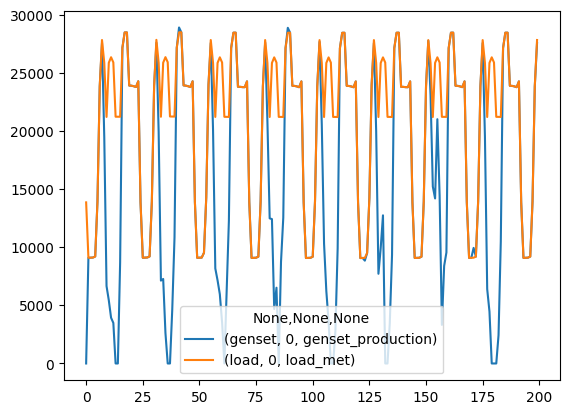

In [31]:
output.plot(y=[("genset", 0, "genset_production"), ("load", 0, "load_met")])

<AxesSubplot:>

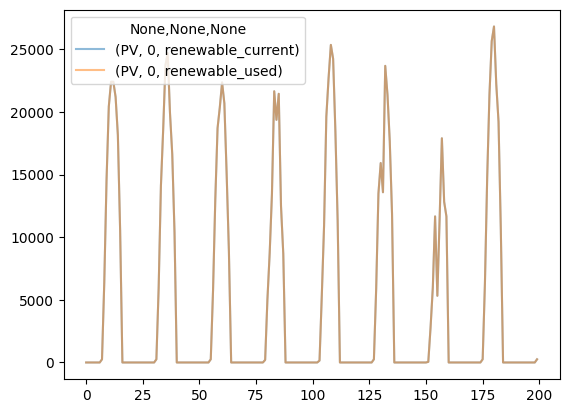

In [39]:
output.plot(y=[("PV", 0, "renewable_current"), ("PV", 0, "renewable_used")], alpha=0.5)

## Reinforcement Learning

See example script in GridRL-V2 repo: `scripts/dqn_simulated_modular_env.py`